In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K

In [2]:
# load saved df
df = pd.read_pickle('test.pkl')
print (df.keys())

Index([      b'pt_of_muon',      b'eta_of_muon',      b'phi_of_muon',
         b'energy_of_muon',        b'hcal_ieta',        b'hcal_iphi',
           b'IsolationR04',     b'IsolationR03',      b'ecal_3into3',
            b'hcal_3into3',         b'ecal_3x3',         b'hcal_1x1',
       'b'hcal_edepth1'_x', 'b'hcal_edepth2'_x', 'b'hcal_edepth3'_x',
       'b'hcal_edepth4'_x', 'b'hcal_edepth5'_x', 'b'hcal_edepth6'_x',
       'b'hcal_edepth7'_x', 'b'hcal_edepth1'_y', 'b'hcal_edepth2'_y',
       'b'hcal_edepth3'_y', 'b'hcal_edepth4'_y', 'b'hcal_edepth5'_y',
       'b'hcal_edepth6'_y', 'b'hcal_edepth7'_y'],
      dtype='object')


In [3]:
# filter events
ieta=22
df = df.loc[abs(df[b'hcal_ieta']) == ieta]

df = df.loc[df["b'hcal_edepth1'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth1'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth2'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth2'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth3'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth3'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth4'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth4'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth5'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth5'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth6'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth6'_y"] > 0.00001]

if ieta in range (26,28):
    df = df.loc[df["b'hcal_edepth7'_x"] > 0.00001]
    df = df.loc[df["b'hcal_edepth7'_y"] > 0.00001]

In [4]:
df["b'hcal_edepth1'_x"]=np.log(10000*df["b'hcal_edepth1'_x"])
df["b'hcal_edepth1'_y"]=np.log(10000*df["b'hcal_edepth1'_y"])

df["b'hcal_edepth2'_x"]=np.log(10000*df["b'hcal_edepth2'_x"])
df["b'hcal_edepth2'_y"]=np.log(10000*df["b'hcal_edepth2'_y"])

df["b'hcal_edepth3'_x"]=np.log(10000*df["b'hcal_edepth3'_x"])
df["b'hcal_edepth3'_y"]=np.log(10000*df["b'hcal_edepth3'_y"])

df["b'hcal_edepth4'_x"]=np.log(10000*df["b'hcal_edepth4'_x"])
df["b'hcal_edepth4'_y"]=np.log(10000*df["b'hcal_edepth4'_y"])

df["b'hcal_edepth5'_x"]=np.log(10000*df["b'hcal_edepth5'_x"])
df["b'hcal_edepth5'_y"]=np.log(10000*df["b'hcal_edepth5'_y"])

df["b'hcal_edepth6'_x"]=np.log(10000*df["b'hcal_edepth6'_x"])
df["b'hcal_edepth6'_y"]=np.log(10000*df["b'hcal_edepth6'_y"])

if ieta in range (26,28):
    df["b'hcal_edepth7'_x"]=np.log(10000*df["b'hcal_edepth7'_x"])
    df["b'hcal_edepth7'_y"]=np.log(10000*df["b'hcal_edepth7'_y"])

In [5]:
# keep originals before scaling
df['hcal_edepth1_un'] = df["b'hcal_edepth1'_x"]
df['hcal_edepth2_un'] = df["b'hcal_edepth2'_x"]
df['hcal_edepth3_un'] = df["b'hcal_edepth3'_x"]
df['hcal_edepth4_un'] = df["b'hcal_edepth4'_x"]
df['hcal_edepth5_un'] = df["b'hcal_edepth5'_x"]
df['hcal_edepth6_un'] = df["b'hcal_edepth6'_x"]
df['hcal_edepth7_un'] = df["b'hcal_edepth7'_x"]

df['hcal_ieta_un'] = df[b'hcal_ieta']

In [6]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_edepth1'_x", "b'hcal_edepth2'_x", "b'hcal_edepth3'_x",
               "b'hcal_edepth4'_x", "b'hcal_edepth5'_x", "b'hcal_edepth6'_x",
               "b'hcal_edepth7'_x"]


df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


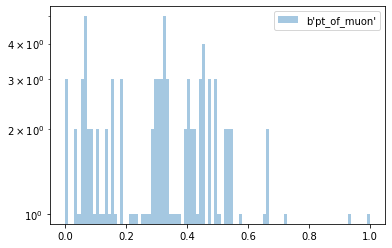

b'eta_of_muon'


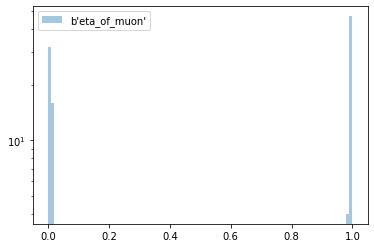

b'phi_of_muon'


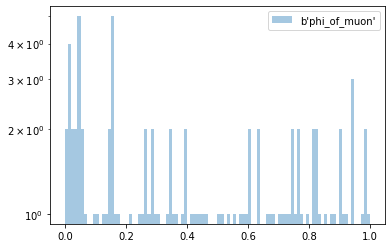

b'energy_of_muon'


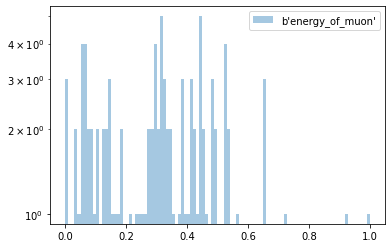

b'hcal_ieta'


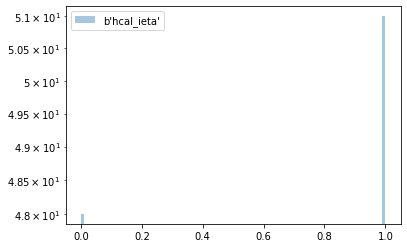

b'hcal_iphi'


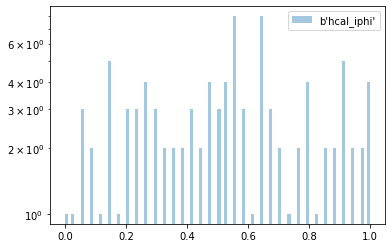

b'IsolationR04'


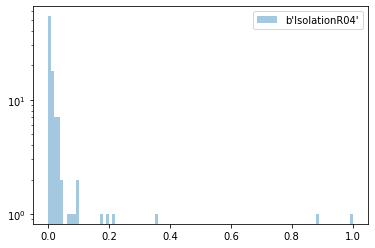

b'IsolationR03'


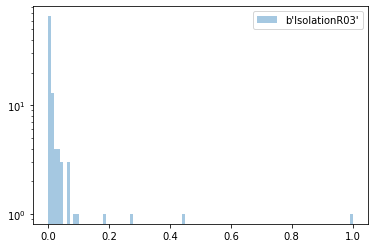

b'ecal_3into3'


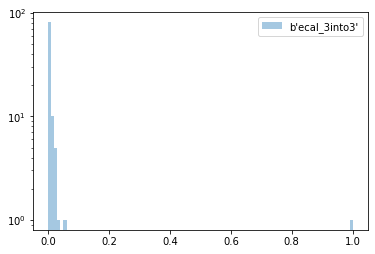

b'hcal_3into3'


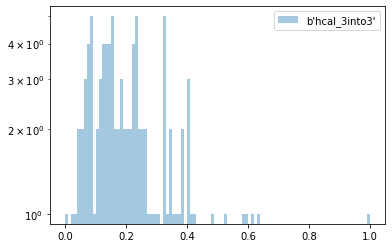

b'ecal_3x3'


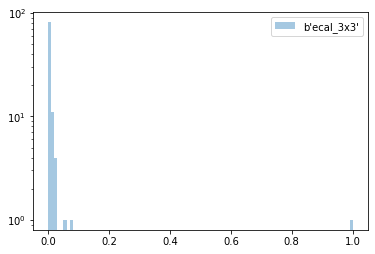

b'hcal_1x1'


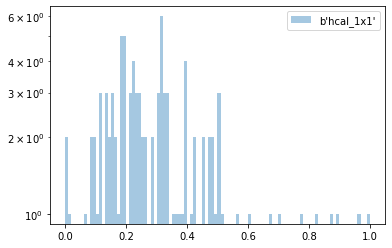

b'hcal_edepth1'_x


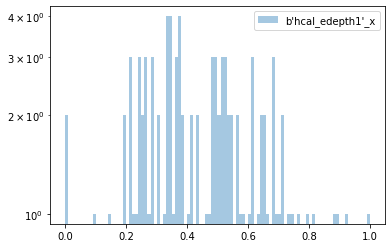

b'hcal_edepth2'_x


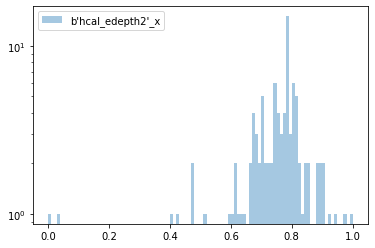

b'hcal_edepth3'_x


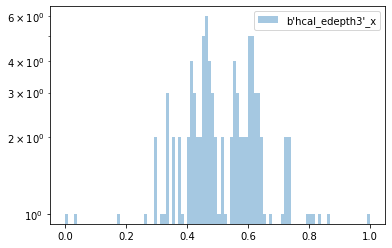

b'hcal_edepth4'_x


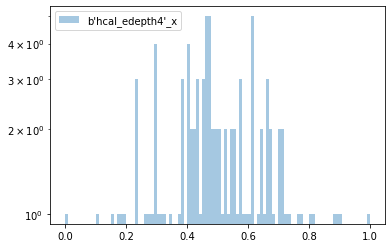

b'hcal_edepth5'_x


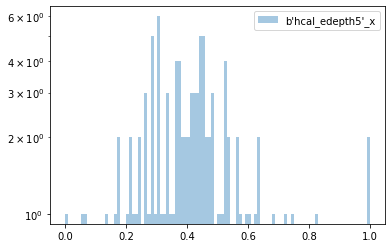

b'hcal_edepth6'_x


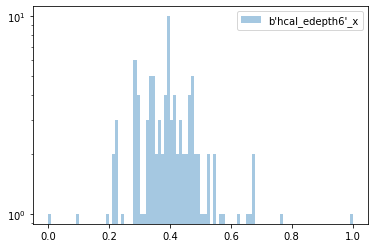

b'hcal_edepth7'_x
b'hcal_edepth1'_y


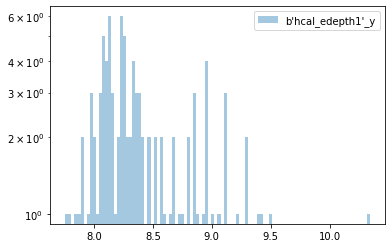

b'hcal_edepth2'_y


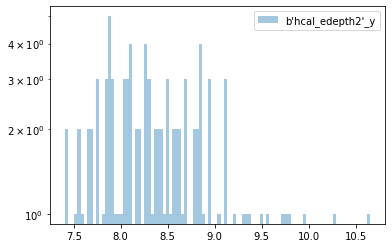

b'hcal_edepth3'_y


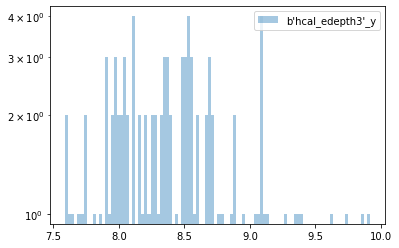

b'hcal_edepth4'_y


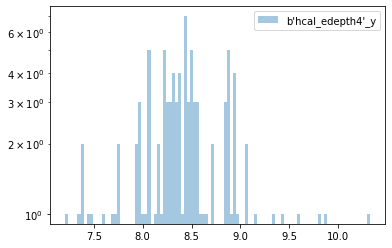

b'hcal_edepth5'_y


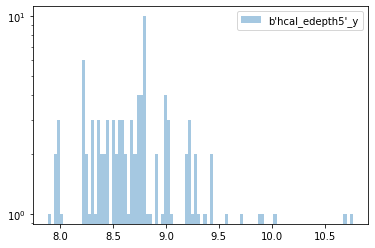

b'hcal_edepth6'_y


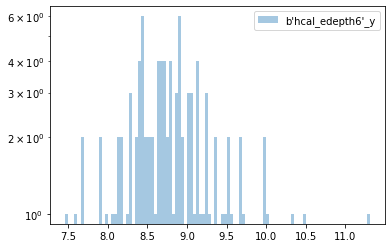

b'hcal_edepth7'_y
hcal_edepth1_un


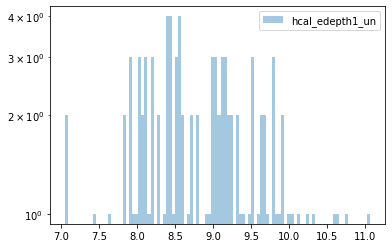

hcal_edepth2_un


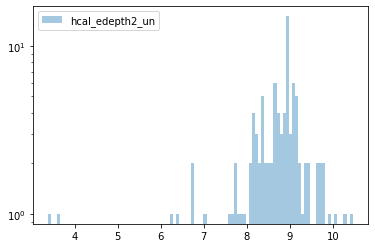

hcal_edepth3_un


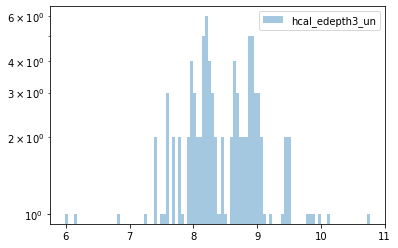

hcal_edepth4_un


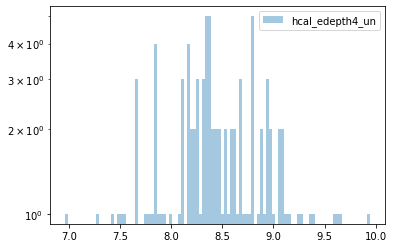

hcal_edepth5_un


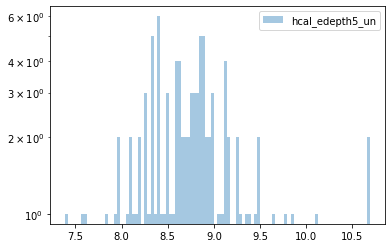

hcal_edepth6_un


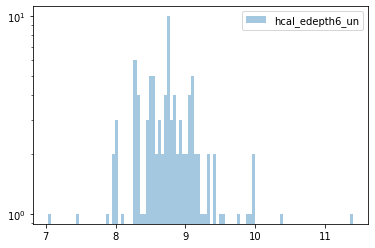

hcal_edepth7_un


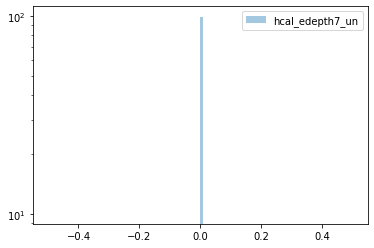

hcal_ieta_un


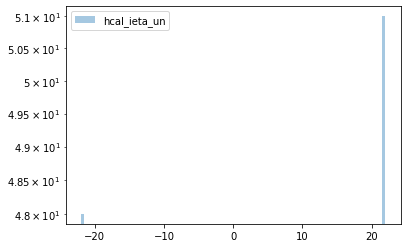

In [7]:
for i in (df.keys()):
    print (i)
    if ieta not in range (26,28):
        if i == "b'hcal_edepth7'_x":
            continue
        if i == "b'hcal_edepth7'_y":
            continue
        if i == "b'hcal_edepth7'_un":
            continue
    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [9]:
#print(df.keys)
data = df.values
print (data.shape[0])
ntest = 20
testindx = data.shape[0] - ntest
X_train_depth1 = data[:testindx,np.r_[0:12,12]]   
X_train_depth2 = data[:testindx,np.r_[0:12,13]] 
X_train_depth3 = data[:testindx,np.r_[0:12,14]] 
X_train_depth4 = data[:testindx,np.r_[0:12,15]] 
X_train_depth5 = data[:testindx,np.r_[0:12,16]] 
X_train_depth6 = data[:testindx,np.r_[0:12,17]] 
X_train_depth7 = data[:testindx,np.r_[0:12,18]]

Y_train_depth1 = data[:testindx,19]
Y_train_depth2 = data[:testindx,20]
Y_train_depth3 = data[:testindx,21]
Y_train_depth4 = data[:testindx,22]
Y_train_depth5 = data[:testindx,23]
Y_train_depth6 = data[:testindx,24]
Y_train_depth7 = data[:testindx,25]

X_test = data[testindx:,:]
#print(X_test)
print (X_test.shape) 
print ("shape of X_train_depth1:",X_train_depth1.shape)
#print ("shape of X_train_depth2:",X_train_depth2.shape)
print ("shape of Y_train_depth2:",Y_train_depth1.shape)


99
(20, 34)
shape of X_train_depth1: (79, 13)
shape of Y_train_depth2: (79,)


true_hist_depth1[0] =  [49 21  8  1]
sum weight_depth1: 100.0
true_hist_depth1 [49 21  8  1]
weight_vals_depth1: [ 1.7106201   3.9914469  10.47754811 83.82038489]


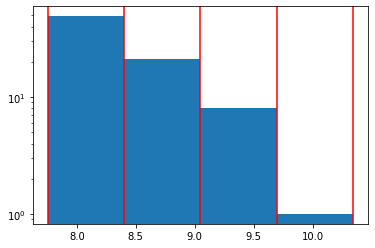

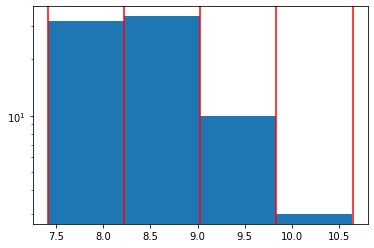

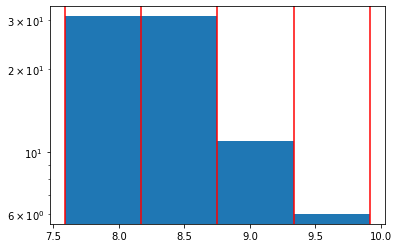

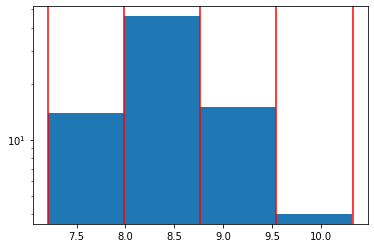

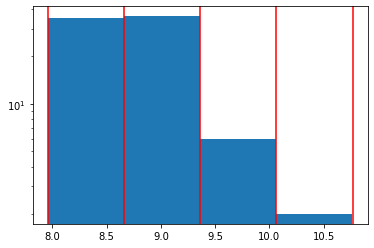

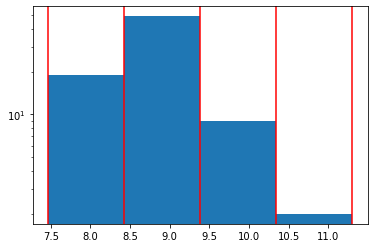

In [10]:
# sample weights
histoAR_depth1 = Y_train_depth1.copy()
histoAR_depth2 = Y_train_depth2.copy()
histoAR_depth3 = Y_train_depth3.copy()
histoAR_depth4 = Y_train_depth4.copy()
histoAR_depth5 = Y_train_depth5.copy()
histoAR_depth6 = Y_train_depth6.copy()
histoAR_depth7 = Y_train_depth7.copy()

nbins = 4 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt

true_hist_depth1 = np.histogram(histoAR_depth1,bins = nbins,
                                range=(np.min(Y_train_depth1)-0.001,np.max(Y_train_depth1)+0.001))
true_hist_depth2 = np.histogram(histoAR_depth2,bins = nbins,
                                range=(np.min(Y_train_depth2)-0.001,np.max(Y_train_depth2)+0.001))
true_hist_depth3 = np.histogram(histoAR_depth3,bins = nbins,
                                range=(np.min(Y_train_depth3)-0.001,np.max(Y_train_depth3)+0.001))
true_hist_depth4 = np.histogram(histoAR_depth4,bins = nbins,
                                range=(np.min(Y_train_depth4)-0.001,np.max(Y_train_depth4)+0.001))
true_hist_depth5 = np.histogram(histoAR_depth5,bins = nbins,
                                range=(np.min(Y_train_depth5)-0.001,np.max(Y_train_depth5)+0.001))
true_hist_depth6 = np.histogram(histoAR_depth6,bins = nbins,
                                range=(np.min(Y_train_depth6)-0.001,np.max(Y_train_depth6)+0.001))
true_hist_depth7 = np.histogram(histoAR_depth7,bins = nbins,
                                range=(np.min(Y_train_depth7)-0.001,np.max(Y_train_depth7)+0.001))


binweight_depth1 = true_hist_depth1[0][np.digitize(histoAR_depth1,true_hist_depth1[1]) - 1]
binweight_depth2 = true_hist_depth2[0][np.digitize(histoAR_depth2,true_hist_depth2[1]) - 1]
binweight_depth3 = true_hist_depth3[0][np.digitize(histoAR_depth3,true_hist_depth3[1]) - 1]
binweight_depth4 = true_hist_depth4[0][np.digitize(histoAR_depth4,true_hist_depth4[1]) - 1]
binweight_depth5 = true_hist_depth5[0][np.digitize(histoAR_depth5,true_hist_depth5[1]) - 1]
binweight_depth6 = true_hist_depth6[0][np.digitize(histoAR_depth6,true_hist_depth6[1]) - 1]
binweight_depth7 = true_hist_depth7[0][np.digitize(histoAR_depth7,true_hist_depth7[1]) - 1]


print ("true_hist_depth1[0] = ", true_hist_depth1[0])

binweight_depth1 = 1/binweight_depth1
binweight_depth2 = 1/binweight_depth2
binweight_depth3 = 1/binweight_depth3
binweight_depth4 = 1/binweight_depth4
binweight_depth5 = 1/binweight_depth5
binweight_depth6 = 1/binweight_depth6
binweight_depth7 = 1/binweight_depth7

binweight_depth1 = 100*binweight_depth1/np.sum(np.unique(binweight_depth1)) ## 5000/5 ok
binweight_depth2 = 100*binweight_depth2/np.sum(np.unique(binweight_depth2))
binweight_depth3 = 100*binweight_depth3/np.sum(np.unique(binweight_depth3))
binweight_depth4 = 100*binweight_depth4/np.sum(np.unique(binweight_depth4))
binweight_depth5 = 100*binweight_depth5/np.sum(np.unique(binweight_depth5))
binweight_depth6 = 100*binweight_depth6/np.sum(np.unique(binweight_depth6))
binweight_depth7 = 100*binweight_depth7/np.sum(np.unique(binweight_depth7))


print("sum weight_depth1:",np.sum(np.unique(binweight_depth1)))
print("true_hist_depth1",true_hist_depth1[0])
#print("binweight_depth1",binweight_depth1)
print("weight_vals_depth1:",np.unique(binweight_depth1))

if ieta in range (26,28):
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6, binweight_depth7]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5,
               histoAR_depth6, histoAR_depth7]
    
    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1], true_hist_depth7[1]]
    
    for i in range (0,7):
        plt.hist(histoAR[i],bins=nbins)
        
        for j in true_hist[i]:
            plt.axvline(j,color='r')
        
        plt.yscale("log")
        plt.show()
else:
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5, 
               histoAR_depth6]

    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1]]


    for i in range (0,6):
        plt.hist(histoAR[i],bins=nbins)

        for j in true_hist[i]:
            plt.axvline(j,color='r')
        plt.yscale("log")
        plt.show()

In [11]:
import keras.backend as kb
def custom_loss_depth(preds, targets):
    return (kb.square(preds-targets))


In [14]:
PYTHONHASHSEED=0
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

print ("creating model=========>")

input1=Input(shape=(X_train_depth1.shape[1],))
input2=Input(shape=(X_train_depth2.shape[1],))
input3=Input(shape=(X_train_depth3.shape[1],))
input4=Input(shape=(X_train_depth4.shape[1],))
input5=Input(shape=(X_train_depth5.shape[1],))
input6=Input(shape=(X_train_depth6.shape[1],))
if ieta in range (26,28):
    input7=Input(shape=(X_train_depth7.shape[1],))

x1 = Dense(16, activation="relu")(input1)
x1 = Dense(8, activation="relu")(x1)
x1 = Dense(4, activation="relu")(x1)
x1 = Model(inputs=input1, outputs=x1)
x2 = Dense(32, activation="relu")(input2)
x2 = Dense(16, activation="relu")(x2)
x2 = Dense(4, activation="relu")(x2)
x2 = Model(inputs=input2, outputs=x2)
x3 = Dense(32, activation="relu")(input3)
x3 = Dense(16, activation="relu")(x3)
x3 = Dense(4, activation="relu")(x3)
x3 = Model(inputs=input3, outputs=x3)
x4 = Dense(32, activation="relu")(input4)
x4 = Dense(16, activation="relu")(x4)
x4 = Dense(4, activation="relu")(x4)
x4 = Model(inputs=input4, outputs=x4)
x5 = Dense(64, activation="relu")(input5)
x5 = Dense(16, activation="relu")(x5)
x5 = Dense(4, activation="relu")(x5)
x5 = Model(inputs=input5, outputs=x5)
x6 = Dense(32, activation="relu")(input6)
x6 = Dense(16, activation="relu")(x6)
x6 = Dense(4, activation="relu")(x6)
x6 = Model(inputs=input6, outputs=x6)
if ieta in range (26,28):
    x7 = Dense(32, activation="relu")(input7)
    x7 = Dense(16, activation="relu")(x7)
    x7 = Dense(4, activation="relu")(x7)
    x7 = Model(inputs=input7, outputs=x7)

if ieta in range (26,28):
    n=7
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, 
                                              x5.output, x6.output, x7.output])
else:
    n=6
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, x5.output, x6.output])

z1 = Dense(64, activation="relu")(combined)
z1 = Dense(16, activation="relu")(z1)
z1 = Dense(n,)(z1)


if ieta in range (26,28):
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input, x7.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6, X_train_depth7], [Y_train_depth1, Y_train_depth2, Y_train_depth3, 
                         Y_train_depth4, Y_train_depth5, Y_train_depth6, Y_train_depth7], batch_size=4000, 
                         epochs=1500, validation_split=0.2, verbose=1,sample_weight=binweight)
else:
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6],[Y_train_depth1, Y_train_depth2, Y_train_depth3, Y_train_depth4,
                         Y_train_depth5, Y_train_depth6] , batch_size=4000, epochs=1500, validation_split=0.2, 
                         verbose=1,sample_weight=binweight)

creating model=========>
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________

1/1 [==============================] - 0s 30ms/step - loss: 312.8428 - val_loss: 226.5249
Epoch 17/1500
1/1 [==============================] - 0s 30ms/step - loss: 307.6497 - val_loss: 222.4520
Epoch 18/1500
1/1 [==============================] - 0s 30ms/step - loss: 302.1460 - val_loss: 218.1389
Epoch 19/1500
1/1 [==============================] - 0s 30ms/step - loss: 296.3340 - val_loss: 213.5603
Epoch 20/1500
1/1 [==============================] - 0s 31ms/step - loss: 290.1262 - val_loss: 208.6905
Epoch 21/1500
1/1 [==============================] - 0s 31ms/step - loss: 283.4930 - val_loss: 203.5076
Epoch 22/1500
1/1 [==============================] - 0s 31ms/step - loss: 276.4592 - val_loss: 198.0143
Epoch 23/1500
1/1 [==============================] - 0s 30ms/step - loss: 269.0215 - val_loss: 192.1970
Epoch 24/1500
1/1 [==============================] - 0s 32ms/step - loss: 261.1169 - val_loss: 186.0559
Epoch 25/1500
1/1 [==============================] - 0s 30ms/step - loss: 252.

Epoch 97/1500
1/1 [==============================] - 0s 32ms/step - loss: 4.1857 - val_loss: 3.6118
Epoch 98/1500
1/1 [==============================] - 0s 31ms/step - loss: 4.1180 - val_loss: 3.6558
Epoch 99/1500
1/1 [==============================] - 0s 31ms/step - loss: 4.0623 - val_loss: 3.6987
Epoch 100/1500
1/1 [==============================] - 0s 31ms/step - loss: 4.0157 - val_loss: 3.7368
Epoch 101/1500
1/1 [==============================] - 0s 31ms/step - loss: 3.9744 - val_loss: 3.7682
Epoch 102/1500
1/1 [==============================] - 0s 31ms/step - loss: 3.9357 - val_loss: 3.7903
Epoch 103/1500
1/1 [==============================] - 0s 31ms/step - loss: 3.8953 - val_loss: 3.8010
Epoch 104/1500
1/1 [==============================] - 0s 219ms/step - loss: 3.8515 - val_loss: 3.8005
Epoch 105/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.8035 - val_loss: 3.7884
Epoch 106/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.7528 - val_loss:

1/1 [==============================] - 0s 35ms/step - loss: 1.5972 - val_loss: 3.3021
Epoch 179/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.5781 - val_loss: 3.2937
Epoch 180/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.5594 - val_loss: 3.2855
Epoch 181/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.5407 - val_loss: 3.2771
Epoch 182/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.5224 - val_loss: 3.2669
Epoch 183/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.5045 - val_loss: 3.2537
Epoch 184/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.4866 - val_loss: 3.2404
Epoch 185/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.4687 - val_loss: 3.2274
Epoch 186/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.4514 - val_loss: 3.2178
Epoch 187/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.4346 - val_loss: 3.2090
Epoch

Epoch 259/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6248 - val_loss: 2.0845
Epoch 260/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.6180 - val_loss: 2.0671
Epoch 261/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.6115 - val_loss: 2.0490
Epoch 262/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.6049 - val_loss: 2.0313
Epoch 263/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.5983 - val_loss: 2.0176
Epoch 264/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.5917 - val_loss: 2.0034
Epoch 265/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.5854 - val_loss: 1.9893
Epoch 266/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.5792 - val_loss: 1.9762
Epoch 267/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.5733 - val_loss: 1.9636
Epoch 268/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.5673 - val_los

1/1 [==============================] - 0s 30ms/step - loss: 0.3189 - val_loss: 1.4632
Epoch 341/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.3171 - val_loss: 1.4591
Epoch 342/1500
1/1 [==============================] - 0s 30ms/step - loss: 0.3152 - val_loss: 1.4572
Epoch 343/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.3134 - val_loss: 1.4568
Epoch 344/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.3110 - val_loss: 1.4540
Epoch 345/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.3082 - val_loss: 1.4510
Epoch 346/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.3058 - val_loss: 1.4503
Epoch 347/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.3039 - val_loss: 1.4524
Epoch 348/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.3022 - val_loss: 1.4584
Epoch 349/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.3005 - val_loss: 1.4670
Epoch

1/1 [==============================] - 0s 30ms/step - loss: 0.2063 - val_loss: 1.5069
Epoch 422/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.2053 - val_loss: 1.5098
Epoch 423/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.2045 - val_loss: 1.5025
Epoch 424/1500
1/1 [==============================] - 0s 30ms/step - loss: 0.2035 - val_loss: 1.5003
Epoch 425/1500
1/1 [==============================] - 0s 30ms/step - loss: 0.2027 - val_loss: 1.5063
Epoch 426/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.2017 - val_loss: 1.5142
Epoch 427/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.2008 - val_loss: 1.5158
Epoch 428/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.1999 - val_loss: 1.5075
Epoch 429/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.1989 - val_loss: 1.4993
Epoch 430/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.1982 - val_loss: 1.5031
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 0.1461 - val_loss: 1.5791
Epoch 503/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.1453 - val_loss: 1.5766
Epoch 504/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.1448 - val_loss: 1.5835
Epoch 505/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.1442 - val_loss: 1.5939
Epoch 506/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.1435 - val_loss: 1.5973
Epoch 507/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.1430 - val_loss: 1.5881
Epoch 508/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.1423 - val_loss: 1.5852
Epoch 509/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.1417 - val_loss: 1.5933
Epoch 510/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.1411 - val_loss: 1.5972
Epoch 511/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.1404 - val_loss: 1.6037
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.0984 - val_loss: 1.7993
Epoch 584/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.0978 - val_loss: 1.7982
Epoch 585/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0972 - val_loss: 1.7975
Epoch 586/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.0967 - val_loss: 1.8085
Epoch 587/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0962 - val_loss: 1.8137
Epoch 588/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0956 - val_loss: 1.8114
Epoch 589/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0951 - val_loss: 1.8124
Epoch 590/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0946 - val_loss: 1.8297
Epoch 591/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0941 - val_loss: 1.8337
Epoch 592/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.0936 - val_loss: 1.8237
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 0.0665 - val_loss: 1.9091
Epoch 665/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0662 - val_loss: 1.9146
Epoch 666/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0659 - val_loss: 1.9057
Epoch 667/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0656 - val_loss: 1.9098
Epoch 668/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0654 - val_loss: 1.9253
Epoch 669/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0651 - val_loss: 1.9232
Epoch 670/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0649 - val_loss: 1.9003
Epoch 671/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0646 - val_loss: 1.9074
Epoch 672/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0642 - val_loss: 1.9297
Epoch 673/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0641 - val_loss: 1.9174
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 0.0470 - val_loss: 1.9343
Epoch 746/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0468 - val_loss: 1.9323
Epoch 747/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0466 - val_loss: 1.9430
Epoch 748/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0464 - val_loss: 1.9483
Epoch 749/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0462 - val_loss: 1.9357
Epoch 750/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0460 - val_loss: 1.9352
Epoch 751/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0458 - val_loss: 1.9469
Epoch 752/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0456 - val_loss: 1.9519
Epoch 753/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0454 - val_loss: 1.9401
Epoch 754/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0452 - val_loss: 1.9338
Epoch

1/1 [==============================] - 0s 31ms/step - loss: 0.0327 - val_loss: 1.9957
Epoch 827/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0327 - val_loss: 1.9824
Epoch 828/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0323 - val_loss: 1.9610
Epoch 829/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0323 - val_loss: 1.9753
Epoch 830/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0322 - val_loss: 1.9890
Epoch 831/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0319 - val_loss: 1.9939
Epoch 832/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0318 - val_loss: 1.9985
Epoch 833/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0317 - val_loss: 1.9972
Epoch 834/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0314 - val_loss: 1.9970
Epoch 835/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0314 - val_loss: 1.9849
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 0.0233 - val_loss: 2.0151
Epoch 908/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0231 - val_loss: 2.0214
Epoch 909/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0231 - val_loss: 2.0290
Epoch 910/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0230 - val_loss: 2.0266
Epoch 911/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0229 - val_loss: 2.0206
Epoch 912/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0227 - val_loss: 2.0179
Epoch 913/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0228 - val_loss: 2.0039
Epoch 914/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0227 - val_loss: 2.0262
Epoch 915/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0225 - val_loss: 2.0301
Epoch 916/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0225 - val_loss: 2.0105
Epoch

1/1 [==============================] - 0s 31ms/step - loss: 0.0170 - val_loss: 1.9867
Epoch 989/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0169 - val_loss: 1.9888
Epoch 990/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0169 - val_loss: 1.9752
Epoch 991/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0168 - val_loss: 1.9693
Epoch 992/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0167 - val_loss: 1.9771
Epoch 993/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0167 - val_loss: 1.9720
Epoch 994/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0166 - val_loss: 1.9786
Epoch 995/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0165 - val_loss: 1.9881
Epoch 996/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0165 - val_loss: 1.9839
Epoch 997/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0164 - val_loss: 1.9813
Epoch

1/1 [==============================] - 0s 36ms/step - loss: 0.0131 - val_loss: 1.9478
Epoch 1069/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0131 - val_loss: 1.9587
Epoch 1070/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0130 - val_loss: 1.9651
Epoch 1071/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0130 - val_loss: 1.9560
Epoch 1072/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0130 - val_loss: 1.9671
Epoch 1073/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0129 - val_loss: 1.9711
Epoch 1074/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0128 - val_loss: 1.9565
Epoch 1075/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.0128 - val_loss: 1.9590
Epoch 1076/1500
1/1 [==============================] - 0s 36ms/step - loss: 0.0128 - val_loss: 1.9623
Epoch 1077/1500
1/1 [==============================] - 0s 37ms/step - loss: 0.0128 - val_loss: 1.9

1/1 [==============================] - 0s 35ms/step - loss: 0.0104 - val_loss: 1.9710
Epoch 1149/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0105 - val_loss: 1.9496
Epoch 1150/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0105 - val_loss: 1.9676
Epoch 1151/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0103 - val_loss: 1.9641
Epoch 1152/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.0103 - val_loss: 1.9389
Epoch 1153/1500
1/1 [==============================] - 0s 38ms/step - loss: 0.0104 - val_loss: 1.9669
Epoch 1154/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0103 - val_loss: 1.9552
Epoch 1155/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.0102 - val_loss: 1.9474
Epoch 1156/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.0102 - val_loss: 1.9634
Epoch 1157/1500
1/1 [==============================] - 0s 36ms/step - loss: 0.0103 - val_loss: 1.9

1/1 [==============================] - 0s 32ms/step - loss: 0.0084 - val_loss: 1.9706
Epoch 1229/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0084 - val_loss: 1.9697
Epoch 1230/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0083 - val_loss: 1.9815
Epoch 1231/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0084 - val_loss: 1.9705
Epoch 1232/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0083 - val_loss: 1.9725
Epoch 1233/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0083 - val_loss: 1.9670
Epoch 1234/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0083 - val_loss: 1.9616
Epoch 1235/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0083 - val_loss: 1.9756
Epoch 1236/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0083 - val_loss: 1.9689
Epoch 1237/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0082 - val_loss: 1.9

1/1 [==============================] - 0s 35ms/step - loss: 0.0068 - val_loss: 1.9985
Epoch 1309/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0067 - val_loss: 1.9875
Epoch 1310/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0067 - val_loss: 1.9871
Epoch 1311/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0067 - val_loss: 1.9932
Epoch 1312/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0067 - val_loss: 1.9861
Epoch 1313/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.0067 - val_loss: 1.9922
Epoch 1314/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0066 - val_loss: 1.9816
Epoch 1315/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0066 - val_loss: 1.9919
Epoch 1316/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0066 - val_loss: 1.9957
Epoch 1317/1500
1/1 [==============================] - 0s 33ms/step - loss: 0.0066 - val_loss: 1.9

1/1 [==============================] - 0s 31ms/step - loss: 0.0055 - val_loss: 2.0403
Epoch 1389/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0055 - val_loss: 2.0102
Epoch 1390/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0057 - val_loss: 2.0439
Epoch 1391/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0056 - val_loss: 2.0103
Epoch 1392/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0054 - val_loss: 2.0293
Epoch 1393/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0053 - val_loss: 2.0273
Epoch 1394/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0052 - val_loss: 2.0134
Epoch 1395/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0053 - val_loss: 2.0409
Epoch 1396/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0054 - val_loss: 2.0121
Epoch 1397/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0055 - val_loss: 2.0

1/1 [==============================] - 0s 31ms/step - loss: 0.0043 - val_loss: 2.0353
Epoch 1469/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0043 - val_loss: 2.0400
Epoch 1470/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 2.0372
Epoch 1471/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0042 - val_loss: 2.0391
Epoch 1472/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 2.0406
Epoch 1473/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 2.0362
Epoch 1474/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 2.0474
Epoch 1475/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 2.0423
Epoch 1476/1500
1/1 [==============================] - 0s 32ms/step - loss: 0.0042 - val_loss: 2.0537
Epoch 1477/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 2.0

dict_keys(['loss', 'val_loss'])


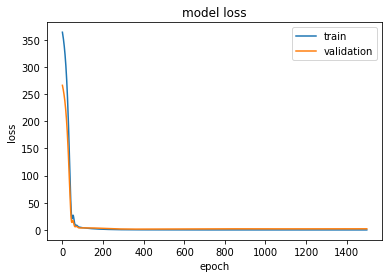

In [15]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [16]:
# evaluate model
if ieta in range (26,28):
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]], 
                           X_test[:,np.r_[0:12,18]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24], 
               X_test[:,25]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30], 
                   X_test[:,31], X_test[:,32]]

else:
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30], 
                   X_test[:,31],]
    
preds = preds.reshape(preds.shape[1],preds.shape[0])

if ieta in range (26,28):
    n=7
else:
    n=6

for i in range (0,n):
    targets[i] = targets[i].reshape(targets[i].shape[0],1)
    uncorrected[i] = uncorrected[i].reshape(uncorrected[i].shape[0],1)
#print(preds[1])
#print(targets[1])
#print (uncorrected[1])

#print(len(targets[1]))
#print(len(uncorrected[1]))
#print(len(preds))
#print(targets[1])

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


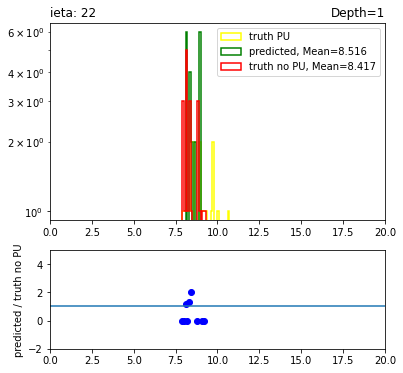

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


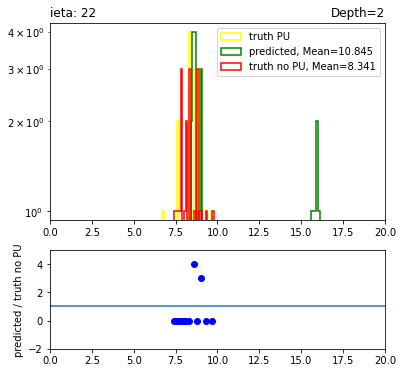

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


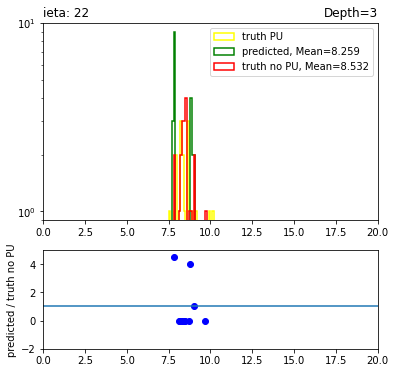

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


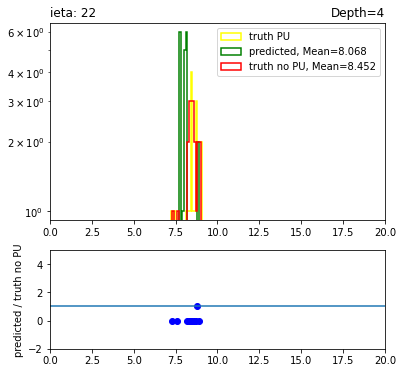

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


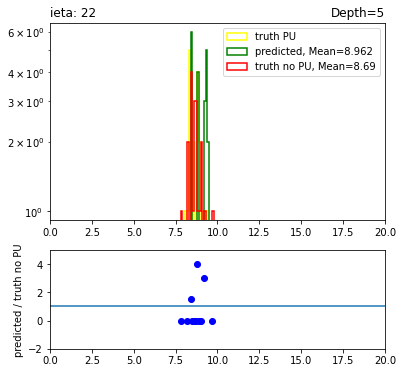

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


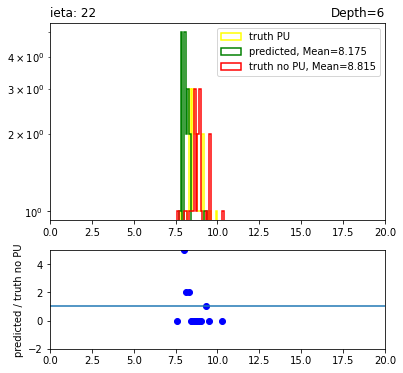

In [17]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(targets[j][:,i]),3)
    b=round(np.mean(preds[j]),3)
    ns, bins, patches = ax.hist([targets[j][:,i], preds[j], uncorrected[j][:,i]], 
                            histtype='step', bins=200,  range=(0,20), linewidth=1.5,
                            label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                            color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.png')
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.pdf')
    plt.show()


In [18]:
import statistics
b=(np.exp(preds[2])/10000)
print((np.exp(preds[0])/10000).mean())
print((np.exp(preds[1])/10000).mean())
print((np.exp(preds[2])/10000).mean())
print((np.exp(preds[3])/10000).mean())
print((np.exp(preds[4])/10000).mean())
print((np.exp(preds[5])/10000).mean())

0.52816117
238.12045
0.44743833
0.3359904
0.83652717
0.39440286


/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


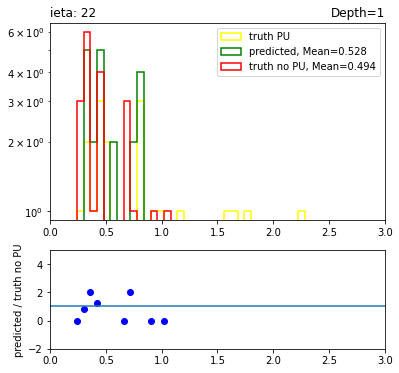

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


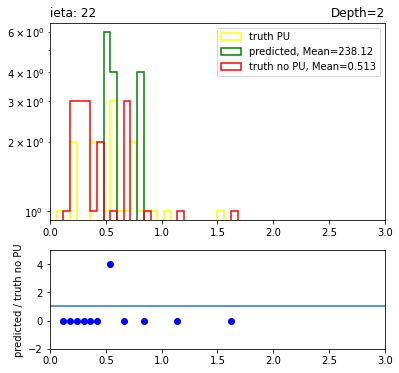

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


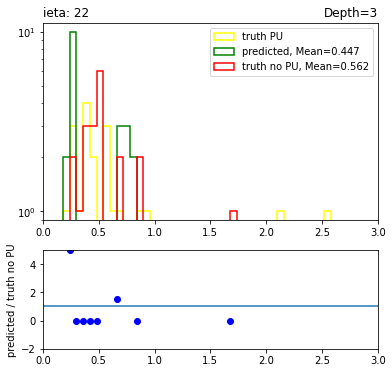

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


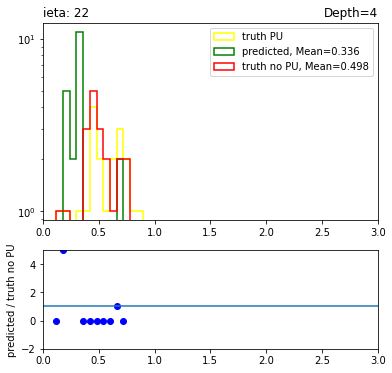

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


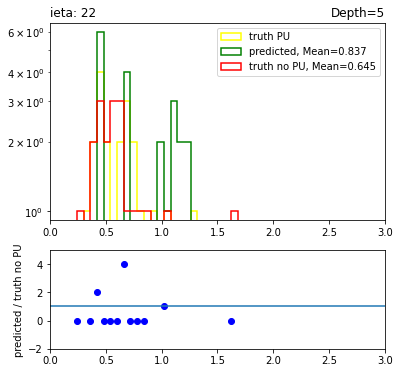

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


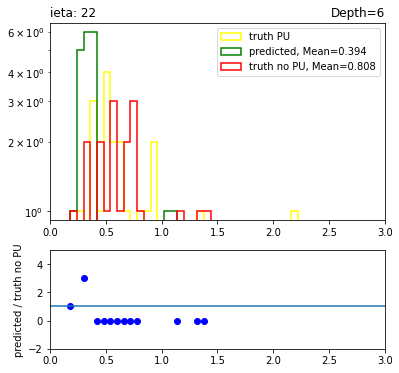

In [19]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(np.exp((targets[j][:,i]))/10000),3)
    b=round(np.mean(np.exp(preds[j])/10000),3)
    ns, bins, patches = ax.hist([(np.exp((targets[j][:,i]))/10000), (np.exp(preds[j])/10000),
                                 (np.exp(uncorrected[j][:,i])/10000)], histtype='step', bins=50,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')   
    plt.xlim(0,3)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 3], [1, 1])
    plt.xlim(0,3)
    plt.ylim(-2,5)
    plt.savefig('nonLog/ieta'+str(ieta)+'_'+str(k)+'_nonLog.png')
    plt.savefig('nonLog/ieta'+str(ieta)+'_'+str(k)+'_nonLog.pdf')
    plt.show()
    



In [ ]:
#save model
import os
if not os.path.exists('model'):
    os.makedirs('model')
model.save('model/model_ieta'+str(ieta)+'.h5')

In [ ]:
import h5py
hf=h5py.File('model/model_ieta'+str(ieta)+'.h5','r')
hf.keys()